<a href="https://colab.research.google.com/github/rajlm10/D2L-Torch/blob/main/D2L_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install d2l -q

     |████████████████████████████████| 82 kB 487 kB/s 
     |████████████████████████████████| 9.9 MB 18.8 MB/s 
     |████████████████████████████████| 61 kB 7.4 MB/s 
     |████████████████████████████████| 11.2 MB 23.1 MB/s 
     |████████████████████████████████| 899 kB 64.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import numpy as np
import torch
from d2l import torch as d2l

# Gradient Descent 

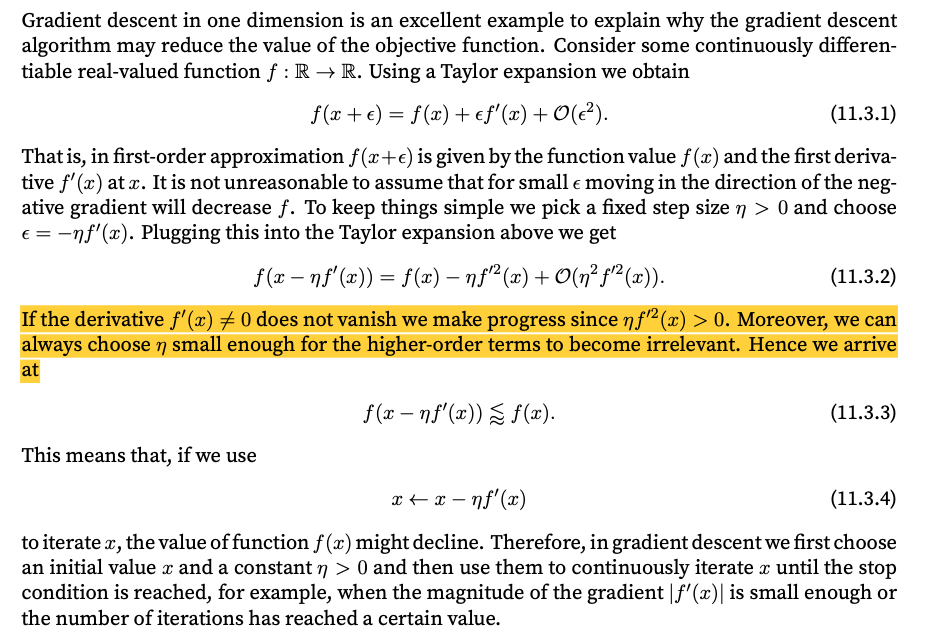

In [2]:
def f(x):  # Objective function
    return x ** 2
def f_grad(x): # Gradient (derivative) of the objective function 
  return 2 * x

In [3]:
def gd(eta, f_grad): 
  x = 10.0
  results = [x]
  for i in range(10):
    x -= eta * f_grad(x)
    results.append(float(x)) 
  print(f'epoch 10, x: {x:f}') 
  return results
results = gd(0.2, f_grad)

epoch 10, x: 0.060466


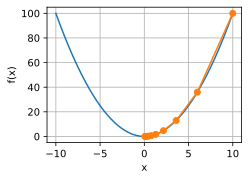

In [4]:
def show_trace(results, f):
  n = max(abs(min(results)), abs(max(results)))
  f_line = torch.arange(-n, n, 0.01)
  d2l.set_figsize()
  d2l.plot([f_line, results], [[f(x) for x in f_line], [f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o']) 
  
show_trace(results, f)

epoch 10, x: 3.486784


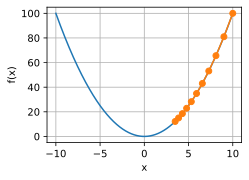

In [5]:
show_trace(gd(0.05, f_grad), f) #Slower learning rate

epoch 10, x: -1.528166


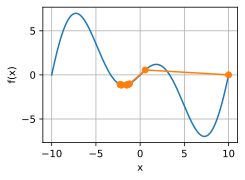

In [6]:
c = torch.tensor(0.15 * np.pi) 
def f(x): # Objective function
  return x * torch.cos(c * x)
def f_grad(x): # Gradient of the objective function
  return torch.cos(c * x) - c * x * torch.sin(c * x) 
  
show_trace(gd(2, f_grad), f) #High learning rate overshoots

epoch 10, x: 7.295479


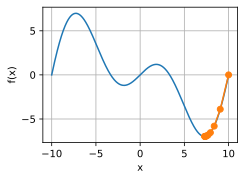

In [7]:
c = torch.tensor(0.15 * np.pi) 
def f(x): # Objective function
  return x * torch.cos(c * x)
def f_grad(x): # Gradient of the objective function
  return torch.cos(c * x) - c * x * torch.sin(c * x) 
  
show_trace(gd(0.2, f_grad), f) 

## Multivariate GD

In [28]:
def train_2d(trainer, steps=20, f_grad=None):
  """Optimize a 2D objective function with a customized trainer."""
  x1, x2 = -5, -2
  results = [(x1, x2)]
  for i in range(steps):
    if f_grad:
      x1, x2 = trainer(x1, x2, f_grad)
    else:
      x1, x2= trainer(x1, x2)
    results.append((x1, x2))
  print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}') 
  return results

def show_trace_2d(f, results):
  """Show the trace of 2D variables during optimization.""" 
  d2l.set_figsize()
  d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
  x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
  torch.arange(-3.0, 1.0, 0.1)) 
  d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
  d2l.plt.xlabel('x1') 
  d2l.plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


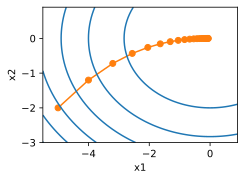

In [13]:
def f_2d(x1, x2): # Objective function 
  return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2): # Gradient of the objective function 
  return (2 * x1, 4 * x2)

def gd_2d(x1, x2,f_grad):
  g1, g2 = f_grad(x1, x2)
  return (x1 - eta * g1, x2 - eta * g2)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

## Newton's method
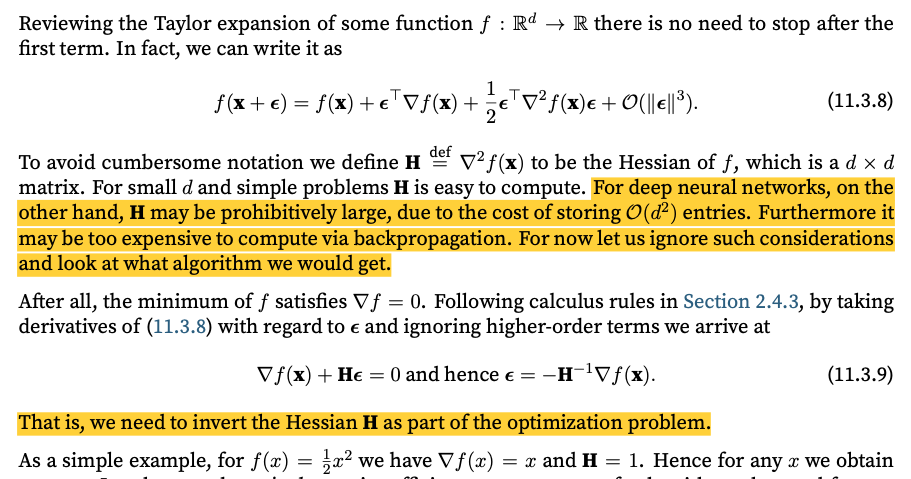

epoch 10, x: tensor(0.)


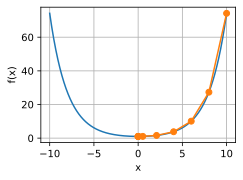

In [14]:
c = torch.tensor(0.5)
def f(x): # Objective function
  return torch.cosh(c * x)

def f_grad(x): # Gradient of the objective function
  return c * torch.sinh(c * x)

def f_hess(x): # Hessian of the objective function
  return c**2 * torch.cosh(c * x)

def newton(eta=1): 
  x = 10.0
  results = [x]
  for i in range(10):
    x -= eta * f_grad(x) / f_hess(x)
    results.append(float(x)) 
  print('epoch 10, x:', x) 
  return results

show_trace(newton(), f) #No learning rate specified

Now let us consider a nonconvex function, such as f(x) = x cos(cx) for some constant c. After all, note that in Newtonʼs method we end up dividing by the Hessian. This means that if the second derivative is negative we may walk into the direction of increasing the value of f . That is a fatal flaw of the algorithm. Let us see what happens in practice.

epoch 10, x: tensor(-31.5426)


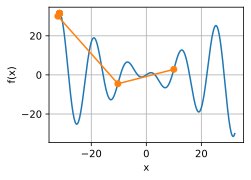

In [15]:
# We overshoot because the hessian is negative here at some x
def f(x): # Objective function 
  return x * torch.cos(c * x)

def f_grad(x): # Gradient of the objective function 
  return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x): # Hessian of the objective function
  return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

## Solving the problem

1) Using the absolute of the Hessian

2) Defining a learning rate (GD won't be as sensitive to it as in regular GD)

epoch 10, x: tensor(-37.8048)


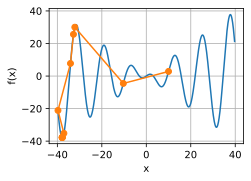

In [18]:
def newton_abs_hessian(eta=1): 
  x = 10.0
  results = [x]
  for i in range(10):
    x -= eta * f_grad(x) / torch.abs(f_hess(x))
    results.append(float(x)) 
  print('epoch 10, x:', x) 
  return results
show_trace(newton_abs_hessian(), f)

epoch 10, x: tensor(6.8386)


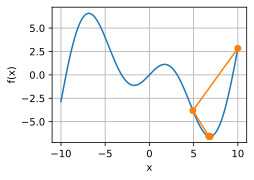

In [21]:
show_trace(newton(0.25), f)

# Stochastic Gradient Descent

If gradient descent is used, the computational cost for each independent variable iteration is O(n), which grows linearly with n. Therefore, when the training dataset is larger, the cost of gradient descent for each iteration will be higher.

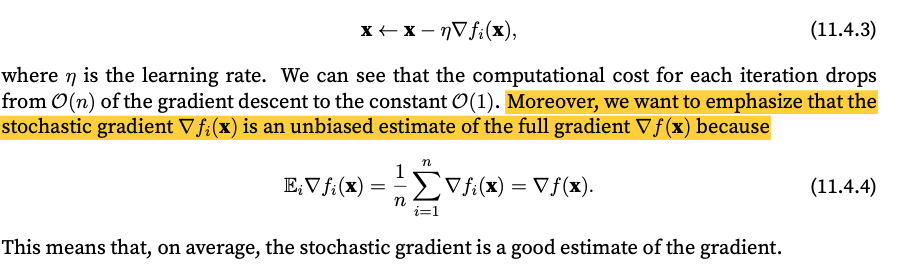

In [22]:
def f(x1, x2):  # Objective function
  return x1 ** 2 + 2 * x2 ** 2
def f_grad(x1, x2): # Gradient of the objective function 
  return 2 * x1, 4 * x2

In [23]:
def sgd(x1, x2, s1, s2, f_grad):
  g1, g2 = f_grad(x1, x2)
  # Simulate noisy gradient
  g1 += torch.normal(0.0, 1, (1,)) 
  g2 += torch.normal(0.0, 1, (1,)) 
  eta_t = eta * lr()
  return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

epoch 50, x1: 0.007270, x2: -0.175318


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


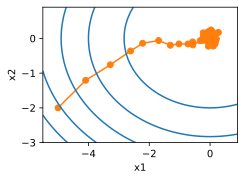

In [24]:
def constant_lr(): 
  return 1
eta = 0.1
lr = constant_lr # Constant learning rate
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

As we can see, the trajectory of the variables in the stochastic gradient descent is much more noisy than the one we observed in gradient descent in Section 11.3. This is due to the stochastic nature of the gradient. That is, even when we arrive near the minimum, we are still subject to the uncertainty injected by the instantaneous gradient via η∇fi(x). Even after 50 steps the quality is still not so good. Even worse, it will not improve after additional steps (we encourage you to experiment with a larger number of steps to confirm this). This leaves us with the only alternative: change the learning rate η. However, if we pick this too small, we will not make any meaningful progress initially. On the other hand, if we pick it too large, we will not get a good solution, as seen above. The only way to resolve these conflicting goals is to reduce the learning rate dynamically as optimization progresses.

## Dynamic Learning Rate

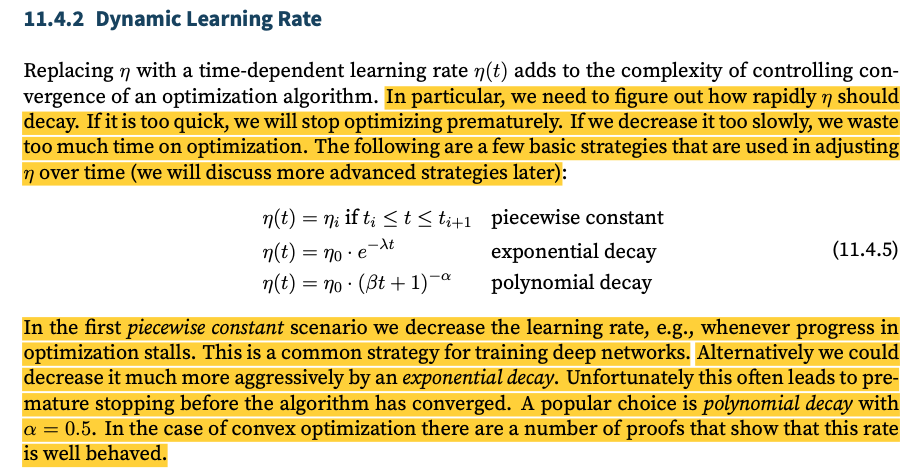

epoch 1000, x1: -0.766722, x2: -0.091482


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


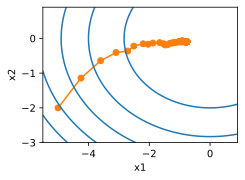

In [30]:
import math
def exponential_lr():
# Global variable that is defined outside this function and updated inside 
  global t
  t += 1
  return math.exp(-0.1 * t)

t=1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

As expected, the variance in the parameters is significantly reduced. However, this comes at the expense of failing to converge to the optimal solution x = (0, 0). Even after 1000 iteration steps are we are still very far away from the optimal solution. Indeed, the algorithm fails to converge at all. On the other hand, if we use a polynomial decay where the learning rate decays with the inverse square root of the number of steps, convergence gets better after only 50 steps.

epoch 50, x1: -0.078712, x2: -0.009724


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


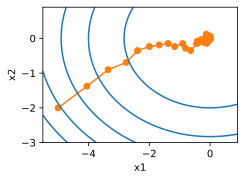

In [31]:
def polynomial_lr():
  # Global variable that is defined outside this function and updated inside 
  global t
  t += 1
  return (1 + 0.1 * t) ** (-0.5)
t=1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))